In [ ]:
import pandas as pd
df=pd.read_csv("/content/annotations.csv") #headand ahoulders
df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,image_from_china-2869-_jpg.rf.e4bcb0e09ed6c8b4...,640,640,with_helmet,48,98,61,108
1,image_from_china-2869-_jpg.rf.e4bcb0e09ed6c8b4...,640,640,with_helmet,69,94,88,108
2,image_from_china-2869-_jpg.rf.e4bcb0e09ed6c8b4...,640,640,with_helmet,203,105,219,114
3,image_from_china-2869-_jpg.rf.e4bcb0e09ed6c8b4...,640,640,with_helmet,233,97,251,108
4,image_from_china-2869-_jpg.rf.e4bcb0e09ed6c8b4...,640,640,with_helmet,262,89,270,100
...,...,...,...,...,...,...,...,...
2173,image_from_china-677-_jpg.rf.f9e5534401e1d50e3...,640,640,with_helmet,553,225,640,366
2174,image_from_china-1415-_jpg.rf.faca78dc1559b858...,640,640,with_helmet,461,236,481,273
2175,image_from_china-1415-_jpg.rf.faca78dc1559b858...,640,640,with_helmet,175,213,207,253
2176,image_from_china-1415-_jpg.rf.faca78dc1559b858...,640,640,with_helmet,171,186,191,228


In [ ]:
import pandas as pd
df=pd.read_csv("/content/annotations.csv") #headand ahoulders
df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,image_from_china-2869-_jpg.rf.e4bcb0e09ed6c8b4...,640,640,with_helmet,48,98,61,108
1,image_from_china-2869-_jpg.rf.e4bcb0e09ed6c8b4...,640,640,with_helmet,69,94,88,108
2,image_from_china-2869-_jpg.rf.e4bcb0e09ed6c8b4...,640,640,with_helmet,203,105,219,114
3,image_from_china-2869-_jpg.rf.e4bcb0e09ed6c8b4...,640,640,with_helmet,233,97,251,108
4,image_from_china-2869-_jpg.rf.e4bcb0e09ed6c8b4...,640,640,with_helmet,262,89,270,100
...,...,...,...,...,...,...,...,...
2173,image_from_china-677-_jpg.rf.f9e5534401e1d50e3...,640,640,with_helmet,553,225,640,366
2174,image_from_china-1415-_jpg.rf.faca78dc1559b858...,640,640,with_helmet,461,236,481,273
2175,image_from_china-1415-_jpg.rf.faca78dc1559b858...,640,640,with_helmet,175,213,207,253
2176,image_from_china-1415-_jpg.rf.faca78dc1559b858...,640,640,with_helmet,171,186,191,228


In [ ]:
df.groupby('class')['class'].count()

class
with_helmet       1590
without_helmet     588
Name: class, dtype: int64

In [ ]:
df['width'].mean()

640.0

In [ ]:
df.filename.value_counts()

image_from_china-674-_jpg.rf.d10fb4e3f386fc8e435b6deb01020feb.jpg     31
image_from_china-665-_jpg.rf.48c4123d76e0ce465713f9f02ed8e2ed.jpg     27
image_from_china-550-_jpg.rf.341341fc3a691315433864c677a6f95c.jpg     16
image_from_china-631-_jpg.rf.e9e772b90a0f40e3ca19331aba784e38.jpg     15
image_from_china-736-_jpg.rf.66473c68978ea5115366b1cd5ca598a7.jpg     14
                                                                      ..
image_from_china-2194-_jpg.rf.34a32e719d21c889a5f9b8d4177859ab.jpg     1
image_from_china-1745-_jpg.rf.34a12e7e40db25802211db13071cc6cb.jpg     1
image_from_china-858-_jpg.rf.32d00c9db30fd49d99a880e99f1739f6.jpg      1
image_from_china-4321-_jpg.rf.300f1aa510dcd0d268cf5dee38a3861e.jpg     1
image_from_china-4258-_jpg.rf.19fe4512ea1c40e727fe664f7a77b5cb.jpg     1
Name: filename, Length: 685, dtype: int64

In [ ]:
df['bbox_width']= df.xmax-df.xmin
df['bbox_height']= df.ymax-df.ymin

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


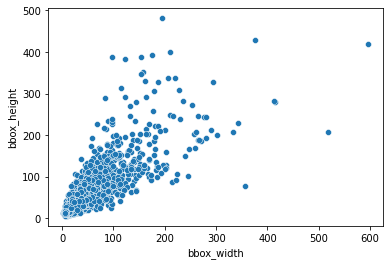

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(df.bbox_width,df.bbox_height)

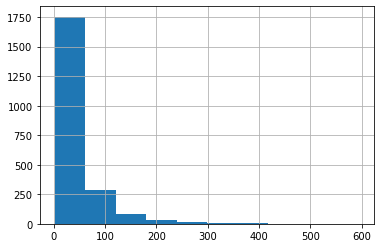

In [ ]:
df.bbox_width.hist()

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
cluster = km.fit_predict(df[['bbox_width','bbox_height']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


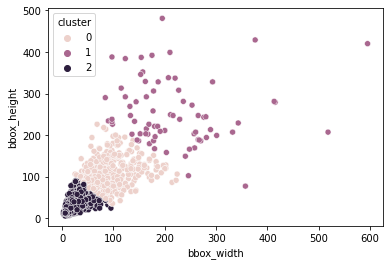

In [ ]:
df['cluster']=cluster
X=df[['bbox_width','bbox_height','cluster']]
sns.scatterplot(X['bbox_width'],X['bbox_height'],hue=X['cluster'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


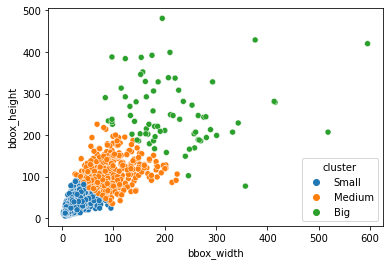

In [ ]:
sns.scatterplot(X['bbox_width'],X['bbox_height'],hue=X['cluster'])

In [ ]:
X['cluster']=X['cluster'].apply( lambda x: 'Small' if x==2 else 'Big'  if x==1 else 'Medium' )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['cluster']=X['cluster']

In [ ]:
X.groupby('cluster')[['bbox_width','bbox_height']].mean()

,bbox_width,bbox_height
cluster,,
Big,215.684932,253.356164
Medium,87.389791,104.524362
Small,24.558542,33.495221


In [ ]:
df[['cluster','class']]

,cluster,class
0,Small,with_helmet
1,Small,with_helmet
2,Small,with_helmet
3,Small,with_helmet
4,Small,with_helmet
...,...,...
2173,Medium,with_helmet
2174,Small,with_helmet
2175,Small,with_helmet
2176,Small,with_helmet


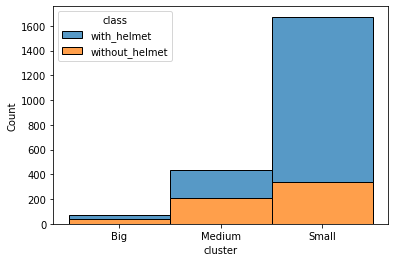

In [ ]:
# df_cl=pd.DataFrame(df.groupby('cluster')['class'].value_counts())
# # df_cl=df_cl.reset_index()
# df_cl.columns=['a','s','ss']
df['cluster']=df['cluster'].astype('category')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="cluster", hue="class", data=df, stat="count", multiple="stack")
# sns.histplot(binwidth=1, x="cluster", hue="class", data=df, stat="count", multiple="dodge")

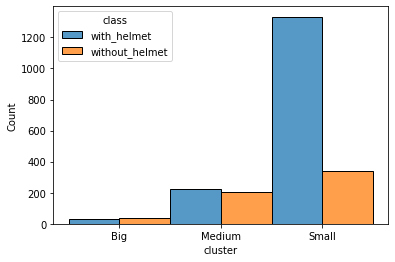

In [ ]:
 sns.histplot(binwidth=1, x="cluster", hue="class", data=df, stat="count", multiple="dodge")

In [ ]:
pd.DataFrame(df.groupby('cluster')['class'].value_counts(normalize=True))

class
cluster class                   
0       with_helmet     0.519722
        without_helmet  0.480278
1       without_helmet  0.547945
        with_helmet     0.452055
2       with_helmet     0.796296
        without_helmet  0.203704

In [ ]:
df['class'].value_counts()

with_helmet       1590
without_helmet     588
Name: class, dtype: int64

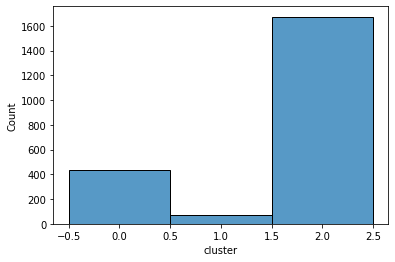

In [ ]:
 sns.histplot(binwidth=1, x="cluster",  data=df, stat="count", multiple="dodge")

In [ ]:
from google.colab import files
df.to_csv('example_file.csv')
files.download('example_file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel("result_plot.xlsx")

In [ ]:
df

,Method,Class,P,R,mAP50
0,Yolov5s-Base line,Overall,0.73,0.51,0.53
1,Yolov5s-Base line,With_Helmet,0.72,0.47,0.51
2,Yolov5s-Base line,Without_Helmet,0.75,0.54,0.54
3,Yolov5s-All best approaches,Overall,0.82,0.59,0.66
4,Yolov5s-All best approaches,With_Helmet,0.81,0.56,0.67
5,Yolov5s-All best approaches,Without_Helmet,0.82,0.63,0.65


In [ ]:
import seaborn as sns
# sns.histplot(binwidth=1, x="Method", hue="class", data=df, stat="count", multiple="dodge")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


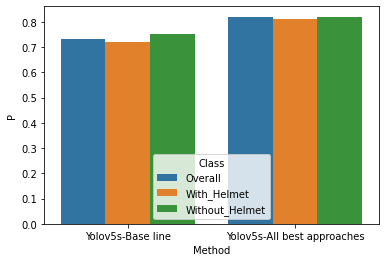

In [ ]:
sns.barplot(df['Method'],df['P'],hue=df['Class'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


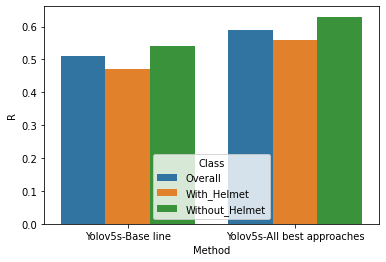

In [ ]:
sns.barplot(df['Method'],df['R'],hue=df['Class'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


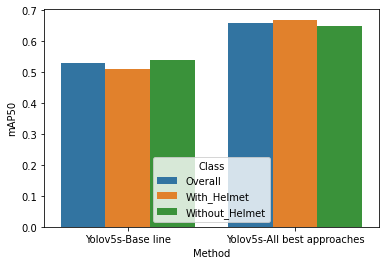

In [ ]:
sns.barplot(df['Method'],df['mAP50'],hue=df['Class'])

Text(0.5, 1.0, 'mAP50')

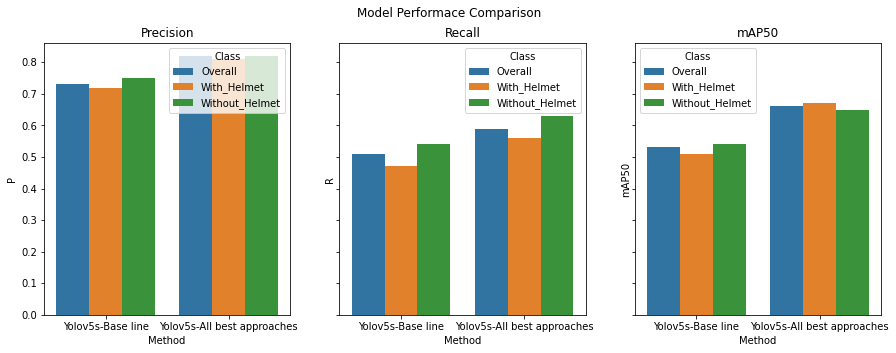

In [ ]:

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Model Performace Comparison')

# Bulbasaur
sns.barplot(ax=axes[0], x=df.Method, y=df.P,hue=df['Class'])
axes[0].set_title('Precision')

# Charmander
sns.barplot(ax=axes[1], x=df.Method, y=df.R,hue=df['Class'])
axes[1].set_title('Recall')

# Squirtle
sns.barplot(ax=axes[2], x=df.Method, y=df.mAP50,hue=df['Class'])
axes[2].set_title('mAP50')